In [1]:
import pandas as pd
import numpy as np

# Problem 1 (Carseats)

## 1.1. Data read

In [2]:
carseats = pd.read_csv('C:/박정섭/2022/05. 수업/04. 데이터사이언스를 위한 머신러닝 및 딥러닝 1/Assignment 1\carseats.csv')

In [3]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## 1.2. Data Preprocessing (Qualitative -> Quantitative)

In [6]:
# generate data for using library(statsmodels) to structure model
X_train = carseats[['Sales', 'Price', 'Urban', 'US']]

X_train.loc[X_train['Urban'] == 'Yes', 'Urban'] = 1
X_train.loc[X_train['Urban'] == 'No', 'Urban'] = 0
X_train.loc[X_train['US'] == 'Yes', 'US'] = 1
X_train.loc[X_train['US'] == 'No', 'US'] = 0

In [7]:
X_train

,Sales,Price,Urban,US
0,9.50,120,1,1
1,11.22,83,1,1
2,10.06,80,1,1
3,7.40,97,1,1
4,4.15,128,1,0
...,...,...,...,...
395,12.57,128,1,1
396,6.14,120,0,1
397,7.41,159,1,1
398,5.94,95,1,1


## 1.3. Model with statsmodels library

In [8]:
import statsmodels.formula.api as sm

## 1.4. Fit Model

### 1.(a). Fit a multiple linear regression model to predict Sales using Price, Urban, and US. Report the R2 of the model.

In [9]:
result = sm.ols(formula = "Sales ~ Price + Urban + US", data=X_train).fit()

In [10]:
print(result.params)

Intercept     13.043469
Urban[T.1]    -0.021916
US[T.1]        1.200573
Price         -0.054459
dtype: float64


In [11]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           2.39e-23
Time:                        02:50:35   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

In [12]:
# RSE
print(np.sqrt(result.scale))
print(np.sqrt(result.mse_resid))

2.4724924402701642
2.4724924402701642


In [13]:
#RSS(=Sum of Squared Residuals)
print(result.ssr)

2420.8346714084723


In [14]:
#scikit-learn
from sklearn import linear_model

X_sk = carseats[['Price', 'Urban','US']]
X_sk.loc[X_sk['Urban']=='Yes', 'Urban'] = 1
X_sk.loc[X_sk['Urban']=='No', 'Urban'] = 0
X_sk.loc[X_sk['US']=='Yes', 'US'] = 1
X_sk.loc[X_sk['US']=='No', 'US'] = 0
Y_sk = carseats[['Sales']]

model = linear_model.LinearRegression()
model.fit(X_sk, Y_sk)
print(model.coef_)
print(model.intercept_)

[[-0.05445885 -0.02191615  1.2005727 ]]
[13.04346894]


### 1.(e). On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [15]:
result = sm.ols(formula = "Sales ~ Price + US", data=X_train).fit()

In [16]:
print(result.params)

Intercept    13.030793
US[T.1]       1.199643
Price        -0.054478
dtype: float64


In [17]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           2.66e-24
Time:                        02:50:35   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [18]:
# RSE
print(np.sqrt(result.scale))
print(np.sqrt(result.mse_resid))

2.469396800574444
2.469396800574444


In [19]:
#RSS(=Sum of Squared Residuals)
print(result.ssr)

2420.8744617988586


### 1.(g). Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [20]:
#confidence interval
print(result.conf_int(0.05))

                  0          1
Intercept  11.79032  14.271265
US[T.1]     0.69152   1.707766
Price      -0.06476  -0.044195


# Problem 2 (Default)

## 2.1. Data Read

In [21]:
Default = pd.read_csv('C:/박정섭/2022/05. 수업/04. 데이터사이언스를 위한 머신러닝 및 딥러닝 1/Assignment 1\Default.csv')

In [22]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [23]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [24]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


## 2.2. Data Preprocessing (Qualitative -> Quantitative)

In [25]:
Default.loc[Default['default'] == 'Yes', 'default'] = 1
Default.loc[Default['default'] == 'No', 'default'] = 0
Default.loc[Default['student'] == 'Yes', 'student'] = 1
Default.loc[Default['student'] == 'No', 'student'] = 0

In [26]:
Default.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [27]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [28]:
Default = Default.astype({'default':'int32', 'student':'int32'})
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int32  
 1   student  10000 non-null  int32  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int32(2)
memory usage: 234.5 KB


## 2.3. Data Visualization

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

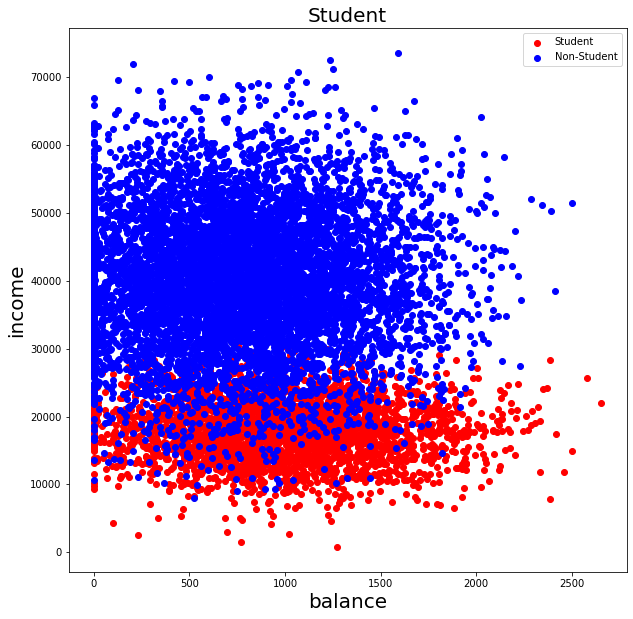

In [30]:
plt.figure(figsize=(10,10))
plt.title("Student", fontsize = 20)
plt.xlabel("balance", fontsize = 20)
plt.ylabel("income", fontsize = 20)

plt.scatter(Default['balance'][Default.student == 1], Default['income'][Default.student == 1], color='red', label='Student')
plt.scatter(Default['balance'][Default.student == 0], Default['income'][Default.student == 0], color='blue', label='Non-Student')

plt.legend()

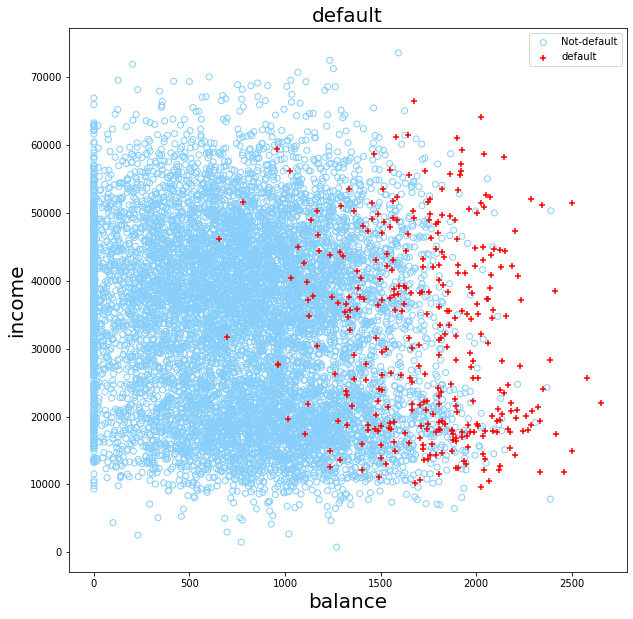

In [31]:
plt.figure(figsize=(10,10))
plt.title("default", fontsize = 20)
plt.xlabel("balance", fontsize = 20)
plt.ylabel("income", fontsize = 20)

plt.scatter(Default['balance'][Default.default == 0], Default['income'][Default.default == 0],
            marker="o", color='lightskyblue', facecolors= 'none', label='Not-default')
plt.scatter(Default['balance'][Default.default == 1], Default['income'][Default.default == 1], 
            marker="+", color='r', label='default')

plt.legend()

In [32]:
num_default = 0
num_nondefault = 0
num_student = 0
num_nonstudent = 0

for i in Default.iloc():
    if (i['default']==1):
        num_default+=1
    if (i['default']==0):
        num_nondefault += 1
    if (i['student']==1):
        num_student += 1
    if (i['student']==0):
        num_nonstudent += 1
        
print("default:", num_default, " -> default rate:", str(round(num_default/len(Default)*100, 2))+"%",
      "("+str(num_default)+"/"+str(len(Default))+")")

print("student:", num_student, " -> student rate:", str(round(num_student/len(Default)*100, 2))+"%",
      "("+str(num_student)+"/"+str(len(Default))+")")

print("non-default:", num_default, " -> non-default rate:", str(round(num_nondefault/len(Default)*100, 2))+"%",
      "("+str(num_nondefault)+"/"+str(len(Default))+")")

print("non-student:", num_nonstudent, " -> non-student rate:", str(round(num_nonstudent/len(Default)*100, 2))+"%",
      "("+str(num_nonstudent)+"/"+str(len(Default))+")")

default: 333  -> default rate: 3.33% (333/10000)
student: 2944  -> student rate: 29.44% (2944/10000)
non-default: 333  -> non-default rate: 96.67% (9667/10000)
non-student: 7056  -> non-student rate: 70.56% (7056/10000)


### 2.(a). Fit a logistic regression model that uses income and balance to predict default using the validation set approach, and estimate the test error of this model. In order to do this, you must perform the following steps:

**- (i) Split the sample set into a training set and a validation set.**

In [33]:
# split the sample set into 80% of training set and 20% of validation set
train = Default.sample(frac=1, random_state = 10) # shuffle
train = train.reset_index(drop=True) # index reset
train = train.sample(frac=0.8, random_state = 52) # random sampling
test = Default.drop(train.index)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 8002 to 2780
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  8000 non-null   int32  
 1   student  8000 non-null   int32  
 2   balance  8000 non-null   float64
 3   income   8000 non-null   float64
dtypes: float64(2), int32(2)
memory usage: 250.0 KB


In [35]:
train = train.drop(['student'], axis=1)
train.head()

,default,balance,income
8002,0,396.513587,41969.746774
5438,0,621.170106,17503.689975
2369,1,1433.167635,18087.686373
8370,0,666.424384,19177.679371
7443,0,591.218487,35287.824584


In [36]:
y = test['default']
y.head()

28    0
35    0
41    0
45    0
49    0
Name: default, dtype: int32

In [37]:
test = test.drop(['default','student'], axis=1)
test.head()

,balance,income
28,615.704277,39376.394619
35,1499.724657,13190.652716
41,837.262623,51471.772095
45,408.772914,54206.939212
49,857.485118,31688.345974


**- (ii) Fit a multiple logistic regression model using only the training observations.**

In [38]:
result = sm.logit(formula = 'default ~ balance+income', data=train).fit(disp=False)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7997
Method:                           MLE   Df Model:                            2
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:                  0.4508
Time:                        02:50:38   Log-Likelihood:                -659.23
converged:                       True   LL-Null:                       -1200.4
Covariance Type:            nonrobust   LLR p-value:                9.215e-236
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1719      0.467    -23.906      0.000     -12.088     -10.256
balance        0.0056      0.000     22.438      0.000       0.005       0.006
income      1.518e-05   5.44e-06      2.791      0.0

In [39]:
# check out odds -> odds = p(X;beta)/1-p(X;beta) = default할 확률/default하지 않을 확률
odds = np.exp(result.params)
print(odds)

Intercept    0.000014
balance      1.005587
income       1.000015
dtype: float64


**- (iii) Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.**

In [40]:
# do prediction with trained model
test_prediction = result.predict(test)
print(test_prediction)

28      0.000789
35      0.068103
41      0.003250
45      0.000312
49      0.002695
          ...   
9993    0.006171
9994    0.000046
9997    0.003790
9998    0.133104
9999    0.000056
Length: 2000, dtype: float64


In [41]:
# classification
test_prediction = test_prediction.mask(test_prediction >= 0.5, 1)
test_prediction = test_prediction.mask(test_prediction < 0.5, 0)
print(test_prediction)

28      0.0
35      0.0
41      0.0
45      0.0
49      0.0
       ... 
9993    0.0
9994    0.0
9997    0.0
9998    0.0
9999    0.0
Length: 2000, dtype: float64


**- (iv) Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.**

In [42]:
TP = 0 #true positive (default - default)
FN = 0 #false negative (default - non_default)
FP = 0 #false positive (non_default - default)
TN = 0 #true negative (non_default - non_default)

for i in zip(y, test_prediction):
    # TP or TN
    if i[0] == i[1]:
        
        # TT (Default를 Default로)
        if i[0] == 1:
            TP += 1
        
        # TN (non-default를 non-default로)
        else:
            TN += 1
            
    # FN or FP
    else:
        
        # FN (Default를 non-default로)
        if i[0] == 1:
            FN += 1
            
        # FP (non-default를 Default로)
        else:
            FP += 1

print("TP:",TP, "FN:", FN, "FP:", FP, "TN:", TN)
accuracy = (TP+TN)/len(y)
simple_split_validation_error = round(1-accuracy,4)
simple_split_validation_FN_rate = round(FN/(FN+TP),4)
print("Accuracy:", accuracy, "("+str(TP+TN)+"/"+str(len(y))+")")
print("Validation set error:", round(1-accuracy,4), "("+str(len(y)-(TP+TN))+"/"+str(len(y))+")")
print("False negative rate:", round(FN/(FN+TP),4), "("+str(FN)+"/"+str(FN+TP)+")")
print("False positive rate:", round(FP/(FP+TN),4), "("+str(FP)+"/"+str(FP+TN)+")")

TP: 27 FN: 59 FP: 7 TN: 1907
Accuracy: 0.967 (1934/2000)
Validation set error: 0.033 (66/2000)
False negative rate: 0.686 (59/86)
False positive rate: 0.0037 (7/1914)


### 2.(c). Perform 5-fold cross-validation using the same model as in Part (a). Write your own code for the K-fold cross-validation. How does the validation error of the cross-validation the differ from to the results in Part (a)?

In [43]:
# shuffle
k_fold_set = Default.sample(frac=1) # shuffle rows
k_fold_set = k_fold_set.reset_index(drop=True) # index reset
k_fold_set = k_fold_set.drop(['student'],axis=1)

# feature normalization (log나 exp에서 overflow 방지)
k_fold_set['balance'] = (k_fold_set['balance']-k_fold_set['balance'].mean())/k_fold_set['balance'].std()
k_fold_set['income'] = (k_fold_set['income']-k_fold_set['income'].mean())/k_fold_set['income'].std()

k_fold_set.head()

,default,balance,income
0,0,-0.314271,-0.318495
1,0,-1.726998,-0.330698
2,0,-1.726998,1.232856
3,0,0.499535,-0.033405
4,0,1.706486,1.517415


In [44]:
# 기존에 내가 logistics regression을 이해하던 minimize(Loss)관점과, 이번 강의에서 배운 maximize(MLE)관점과의 차이

# target?
# minimize Loss = summation of - {y*log(y_hat)+(1-y)*log(1-y_hat)}
# maximize MLE = summation of    {y*log(y_hat)+(1-y)*log(1-y_hat)}

# y_hat? (probability?)
# min(loss) 관점: 1 / (1 + e^(-z))
# max(MLE) 관점: e^(z) / (1 + e^(z))

# iterative optimization?
# min(loss) 관점: gradient descent
# max(MLE) 관점: gradient ascent

# update?
# min(loss) 관점: theta = theta - alpha * derivative of theta (convex할 때에는 현재 위치의 기울기를 빼야 global optima로 이동)
# max(MLE) 관점: theta = theta + alpha * derivative of theta (concave할 때에는 현재 위치의 기울기를 더해야 global optima로 이동)

In [45]:
# get probability, equal to sigmoid function
def get_prob(X, theta):
    
    # (mxn) * (nx1) = (mx1)
    z = np.matmul(X, theta.T)
    
    # (mx1)
    prob_X = np.exp(z) / (1+np.exp(z))
    
    return prob_X

In [46]:
# get log-likelihood, negative of loss function
def log_MLE(prob_X, Y):
    
    m = y.shape[0]
    # element-wise of (mx1)
    log_mle = (1/m)*np.sum(Y*np.log1p(prob_X)+(1-Y)*np.log1p(1-prob_X))
    
    return log_mle

In [47]:
# do gradient ascent, like gradient descent
def gradient_ascent(X, prob_X, Y, theta, learning_rate):
    
    # (nxm) * (mx1) = (nx1)
    d_theta = np.matmul(X.T,np.subtract(Y,prob_X))
    
    # (nx1) + (nx1) = (nx1)
    theta = theta.T + learning_rate*d_theta
    
    return theta.T

In [48]:
#do optimization
def optimization(X, Y, theta, learning_rate, epoch):
    
    MLE_list = []
    
    for i in range(epoch):
        prob_X = get_prob(X, theta)
        log_mle = log_MLE(prob_X, Y)
        theta = gradient_ascent(X, prob_X, Y, theta, learning_rate)
        MLE_list.append(log_mle)
    
    return theta, MLE_list

In [49]:
# logistic regression
def logistic_regression(X, Y, learning_rate, epoch):
    
    # get size of X for theta
    n = X.shape[1]
    
    # random initialize theta
    theta = np.random.rand(1,n)*1/100

    # do optimization
    theta, MLE_list = optimization(X, Y, theta, learning_rate, epoch)
    
    return theta, MLE_list

In [50]:
def predict(theta, X):
    
    # (mx1)
    prob_X = get_prob(X, theta)
    m = prob_X.shape[0]
    Y_hat = np.zeros((m,1))
    
    for i, prob_xi in enumerate(prob_X):
        if prob_xi >= 0.5:
            Y_hat[i] = 1
        else:
            Y_hat[i] = 0
    
    return Y_hat

In [51]:
# split i_th train set and validation set
def split_k_fold(k, i_th, data, n_k):
    
    # for handling when data is not evenly divided by k
    if i_th == (k-1):
        validation_set_x = data.iloc[(i_th*n_k):len(data)]
    else:
        validation_set_x = data.iloc[(i_th*n_k):(i_th*n_k+n_k)]
    validation_set_y = validation_set_x['default']
    validation_set_x = validation_set_x.drop(['default'],axis=1)
    train_set_x = data.drop(validation_set_x.index)
    train_set_y = train_set_x['default']
    train_set_x = train_set_x.drop(['default'],axis=1)
    
    # add column for intercept
    train_set_x['intercept'] = 1
    validation_set_x['intercept'] = 1
    
    # convert into ndarray
    train_set_x = train_set_x.to_numpy()
    train_set_y = train_set_y.to_numpy().reshape(len(train_set_y),1)
    validation_set_x = validation_set_x.to_numpy()
    validation_set_y = validation_set_y.to_numpy().reshape(len(validation_set_y),1)
    
    return train_set_x, train_set_y, validation_set_x, validation_set_y

In [52]:
# set K-fold cross validation
def k_fold_cross_validation(k, data, learning_rate, epoch):
    
    # get sizes
    n = len(data)
    n_k = n//k
    
    # container for MSE
    MSE = []
    
    # container for MSE_mean
    MSE_mean = 0
    
    # container for MLE
    MLE = []
    
    # container for false negative and false positive
    FN_rate_mean = 0
    FP_rate_mean = 0
    
    # fit model for k-times and get MSE
    for i_th in range(k):
        train_X, train_Y, validation_X, validation_Y = split_k_fold(k, i_th, data, n_k)
        theta, MLE_list = logistic_regression(train_X, train_Y, learning_rate, epoch)
        Y_hat = predict(theta, validation_X)
        
        # get MSE
        ith_mse = np.sum(np.square(validation_Y-Y_hat))/len(validation_Y)
        MSE.append(ith_mse)
        MLE.append(MLE_list)
        MSE_mean += len(validation_Y)/n*ith_mse
        
        # get FN and FP
        ith_TP = 0
        ith_TN = 0
        ith_FN = 0
        ith_FP = 0
        
        for i in zip(Y_hat,validation_Y):
            if i[0] == i[1]:
                if i[0] == 1:
                    ith_TP += 1
                else:
                    ith_TN += 1
            else:
                if i[0] == 1:
                    ith_FN += 1
                else:
                    ith_FP += 1
        
        # zero division error handling
        if ith_FN == ith_TP and ith_FN == 0:
            FN_rate_mean += 0
        else:
            FN_rate_mean += len(validation_Y)/n*(round(ith_FN/(ith_FN+ith_TP),4))
        
        if ith_FP == ith_TN and ith_FP == 0:
            FP_rate_mean += 0
        else:
            FP_rate_mean += len(validation_Y)/n*(round(ith_FP/(ith_FP+ith_TN),4))
    
    MSE_mean = round(MSE_mean,4)
    FN_rate_mean = round(FN_rate_mean,4)
    FP_rate_mean = round(FP_rate_mean,4)
    
    return MSE, MSE_mean, MLE, FN_rate_mean, FP_rate_mean

In [53]:
learning_rate_list = [0.05, 0.03, 0.01, 0.005, 0.003, 0.001, 0.0005, 0.0003, 0.0001, 0.00001]
epoch = 1000
# k가 나누어 떨어지는 숫자가 아니더라도 동작 가능(e.g. 3, 6, 9...)
k = 5

MSE_list = []
MSE_mean_list = []
MLE_list = []
FN_rate_mean_list = []
FP_rate_mean_list = []

for lr in learning_rate_list:
    MSE, MSE_mean, MLE, FN_rate_mean, FP_rate_mean = k_fold_cross_validation(k, k_fold_set, lr, epoch)
    
    MSE_list.append(MSE)
    
    MSE_mean_list.append(MSE_mean)
    
    MLE_list.append(MLE)
    
    FN_rate_mean_list.append(FN_rate_mean)
    
    FP_rate_mean_list.append(FP_rate_mean)

In [54]:
print(MSE_mean_list)
print(FN_rate_mean_list)
print(FP_rate_mean_list)

[0.0374, 0.0403, 0.0573, 0.0395, 0.0265, 0.0264, 0.0264, 0.0263, 0.0261, 0.0316]
[0.2714, 0.184, 0.4616, 0.4603, 0.2768, 0.2624, 0.2624, 0.2566, 0.2448, 0.1016]
[0.0246, 0.0283, 0.0176, 0.017, 0.0223, 0.0228, 0.0228, 0.0228, 0.0229, 0.0313]


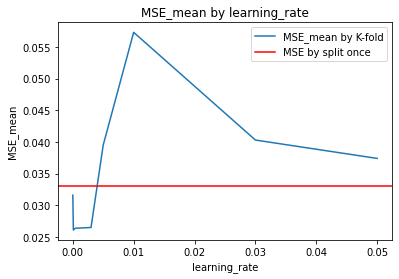

In [55]:
# 약 0.005 이상의 learning_rate를 적용한 k-fold의 MSE는 split once의 MSE보다 오히려 크다.
# 즉, 0.005 보다 작은 learning_rate를 적용해야 함을 말해줌.
# 반면, 0.00001 과 같이 너무 작은 learning_rate를 적용할 경우, MSE가 충분히 줄어들지 못한 것을 확인 가능
x_axis = learning_rate_list
plt.title('MSE_mean by learning_rate')
plt.xlabel('learning_rate')
plt.ylabel('MSE_mean')
plt.plot(x_axis, MSE_mean_list, label='MSE_mean by K-fold')
plt.axhline(y=simple_split_validation_error, c='r', label='MSE by split once')
plt.legend()

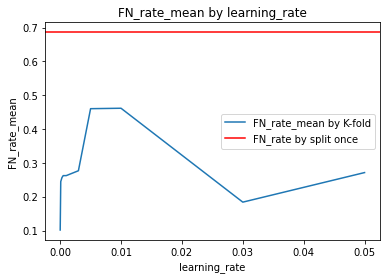

In [56]:
# false negative rate도 k-fold가 전체적으로 낮은 것을 확인할 수 있다.
x_axis = learning_rate_list
plt.title('FN_rate_mean by learning_rate')
plt.xlabel('learning_rate')
plt.ylabel('FN_rate_mean')
plt.plot(x_axis, FN_rate_mean_list, label='FN_rate_mean by K-fold')
plt.axhline(y=simple_split_validation_FN_rate, c='r', label='FN_rate by split once')
plt.legend()

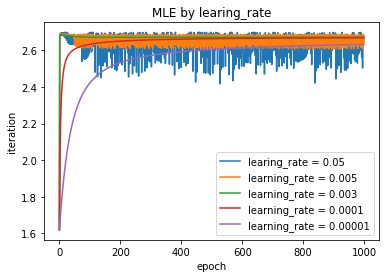

In [57]:
# 0.005 보다 작은 learning_rate를 적용했을 때 MLE가 안정적으로 수렴하는 것을 확인 가능.
# 0.00001 처럼 너무 작은 learning_rate를 적용할 경우,
# global minima를 찾아가는 데에 1000회의 epoch가 충분하지 않아서 MLE가 작게 나오는 것을 확인 가능.
x_axis = np.arange(0,epoch,1)
plt.title('MLE by learing_rate')
plt.xlabel('epoch')
plt.ylabel('iteration')
plt.plot(x_axis, MLE_list[0][0], label='learing_rate = 0.05')
plt.plot(x_axis, MLE_list[3][0], label='learning_rate = 0.005')
plt.plot(x_axis, MLE_list[4][0], label='learning_rate = 0.003')
plt.plot(x_axis, MLE_list[8][0], label='learning_rate = 0.0001')
plt.plot(x_axis, MLE_list[9][0], label='learning_rate = 0.00001')

plt.legend()

### 2.(d). Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the 5-fold cross-validation set approach. Comment on whether or not including a dummy variable for student would lead to a reduction in the test error rate.

In [98]:
# shuffle
k_fold_set_with_student = Default.sample(frac=1) # shuffle rows
k_fold_set_with_student = k_fold_set_with_student.reset_index(drop=True) # index reset

# feature normalization
k_fold_set_with_student['balance'] = (k_fold_set_with_student['balance']-
                                      k_fold_set_with_student['balance'].mean())/k_fold_set_with_student['balance'].std()
k_fold_set_with_student['income'] = (k_fold_set_with_student['income']-
                                     k_fold_set_with_student['income'].mean())/k_fold_set_with_student['income'].std()

k_fold_set_with_student.head()

,default,student,balance,income
0,0,1,0.933328,-1.203601
1,0,0,0.190693,0.532453
2,0,0,-1.176513,0.576406
3,0,0,0.708157,-0.251014
4,0,0,0.755903,0.605014


In [99]:
# 성능이 가장 좋았던 learning_rate = 0.0005를 활용하여 5-fold 수행
epoch = 1000
k = 5

MSE, MSE_mean, MLE, FN_rate, FP_rate = k_fold_cross_validation(k, k_fold_set_with_student, 0.0005, epoch)

In [100]:
print(MSE)
print(MSE_mean)
print(FN_rate)
print(FP_rate)

[0.0305, 0.0245, 0.0295, 0.0255, 0.023]
0.0266
0.2664
0.0228
